In [1]:
# Load the dataset from keras datasets module
from keras.datasets import cifar10
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

Using TensorFlow backend.
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:

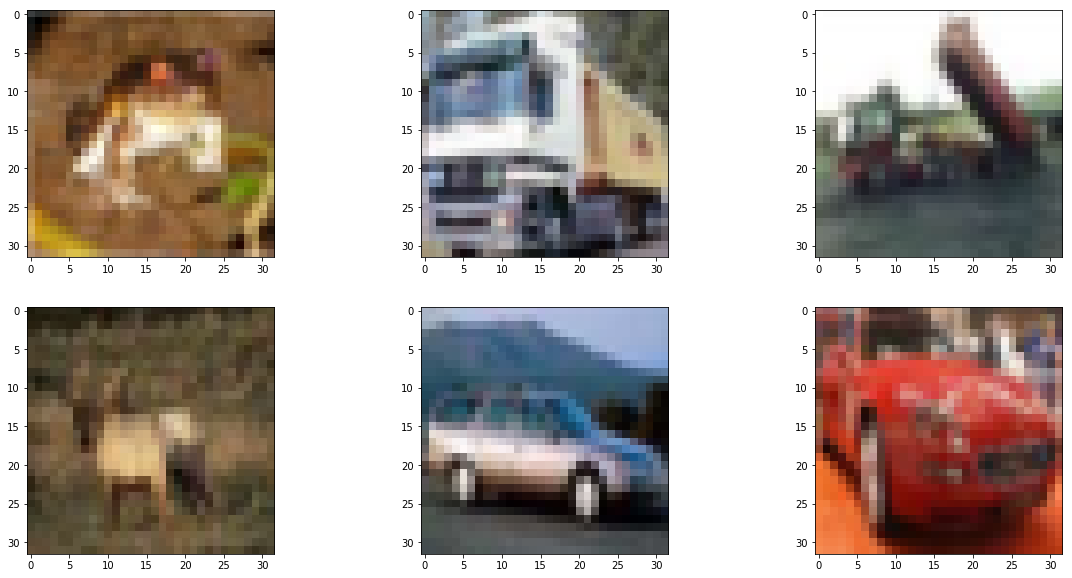

In [2]:
# Plot some images from the dataset to visualize the dataset
n = 6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(230+1+i)
    plt.imshow(X_train[i])

In [3]:
# Import the required layers and modules to create our convolution neural net architecture
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [4]:
# Convert the pixel values of the dataset to float type and then normalize the dataset
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255.0
X_test = X_test/255

In [5]:
print(f'X_train : {X_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'Y_train : {Y_train.shape}')
print(f'Y_test : {Y_test.shape}')

X_train : (50000, 32, 32, 3)
X_test : (10000, 32, 32, 3)
Y_train : (50000, 1)
Y_test : (10000, 1)


In [6]:
# Now perform the one-hot encoding for target classes
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

num_classes = Y_test.shape[1]
num_classes

10

In [7]:
# Create the sequential model and add the layers
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(32,32,3), 
                 padding='same', activation='relu', 
                 kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), 
                 padding='same', activation='relu', 
                 kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, 
                activation='relu', 
                kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [8]:
# Configure the optimizer and compile the model
sgd = SGD(lr=0.01, momentum=0.9, decay=(0.01/25), nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [9]:
# View the model summary for better understanding of model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

In [ ]:
# Train the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 337s 7ms/step - loss: 1.7209 - acc: 0.3766 - val_loss: 1.3848 - val_acc: 0.5049
Epoch 2/10
50000/50000 [==============================] - 326s 7ms/step - loss: 1.3578 - acc: 0.5096 - val_loss: 1.1957 - val_acc: 0.5711
Epoch 3/10
50000/50000 [==============================] - 329s 7ms/step - loss: 1.1749 - acc: 0.5799 - val_loss: 1.1119 - val_acc: 0.6044
Epoch 4/10
50000/50000 [==============================] - 326s 7ms/step - loss: 1.0474 - acc: 0.6283 - val_loss: 1.0313 - val_acc: 0.6349
Epoch 5/10
50000/50000 [==============================] - 325s 7ms/step - loss: 0.9444 - acc: 0.6637 - val_loss: 0.9735 - val_acc: 0.6566
Epoch 6/10
50000/50000 [==============================] - 330s 7ms/step - loss: 0.8607 - acc: 0.6978 - val_loss: 0.9512 - val_acc: 0.6654
Epoch 7/10
50000/50000 [==============================] - 332s 7ms/step - loss: 0.7888 - acc: 0.7226 - val_loss: 0.9287 - 

In [1]:
# Calculate its accuracy on testing data
_, acc = model.evaluate(X_test, Y_test)
print(acc*100)

NameError: name 'model' is not defined

In [ ]:
# Save the model
model.save("model1_cifar_10epoch.h5")